In [1]:
from ultralytics import YOLO

In [5]:
model = YOLO("yolov8n-cls.pt")

model.train(data='D:/FCI/CV/sec/Dataset',epochs=2)

Ultralytics 8.3.48  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i5-4310U 2.00GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=D:/FCI/CV/sec/Dataset, epochs=2, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning D:\FCI\CV\sec\Dataset\train... 4010 images, 0 corrupt: 100%|██████████| 4010/4010 [00:00<?, ?it/s]
val: Scanning D:\FCI\CV\sec\Dataset\test... 3543 images, 0 corrupt: 100%|██████████| 3543/3543 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to D:\FCI\CV\\CV-TASKS\runs\classify\train3
Starting training for 2 epochs...

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 111/111 [01:30<00:00,  1.23it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 111/111 [01:40<00:00,  1.10it/s]

                   all      0.975          1



2 epochs completed in 0.191 hours.
Optimizer stripped from D:\FCI\CV\\CV-TASKS\runs\classify\train3\weights\last.pt, 3.0MB
Optimizer stripped from D:\FCI\CV\\CV-TASKS\runs\classify\train3\weights\best.pt, 3.0MB

Validating D:\FCI\CV\\CV-TASKS\runs\classify\train3\weights\best.pt...
Ultralytics 8.3.48  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i5-4310U 2.00GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: D:\FCI\CV\sec\Dataset\train... found 4010 images in 2 classes  
val: None...
test: D:\FCI\CV\sec\Dataset\test... found 3543 images in 2 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 111/111 [01:17<00:00,  1.43it/s]


                   all      0.975          1
Speed: 0.0ms preprocess, 10.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to D:\FCI\CV\\CV-TASKS\runs\classify\train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002130FAA33E0>
curves: []
curves_results: []
fitness: 0.9877222776412964
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9754445552825928, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9877222776412964}
save_dir: WindowsPath('D:/FCI/CV/سكاشن/CV-TASKS/runs/classify/train3')
speed: {'preprocess': 0.0005633757674959868, 'inference': 10.13295192217847, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9754445552825928
top5: 1.0

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
dataGenerator = ImageDataGenerator(
    rescale = 1/255
)

TestGenerator= dataGenerator.flow_from_directory(directory= 'D:/FCI/CV/sec/Dataset/test',target_size=(176,208),batch_size= 16, class_mode='sparse',shuffle=True)



Found 3543 images belonging to 2 classes.



0: 224x224 with_mask 0.53, without_mask 0.47, 30.0ms
Speed: 20.4ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


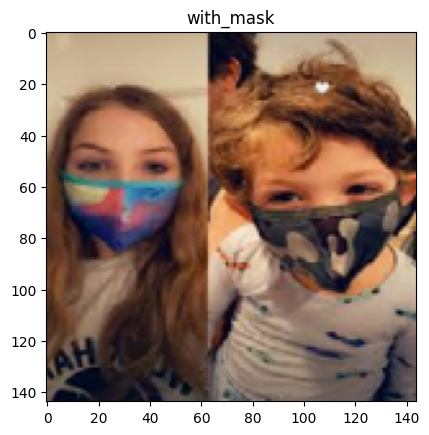

In [9]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

random = next(TestGenerator)

random_image = random[0][0]

random_image = (random_image * 255).astype(np.uint8)

image_PIL = Image.fromarray(random_image)

results = model.predict(source= image_PIL)

predicted = results[0].probs.data


predicted_class = predicted.argmax()

class_name =results[0].names[predicted_class.item()]


plt.imshow(image_PIL.resize((144,144))) 
plt.title(class_name)
plt.show()

